<a href="https://colab.research.google.com/github/acanavera/DecissionSupportSystemforRetailDiscount/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from dateutil.relativedelta import relativedelta
import datetime


# Assuming the given date is Monday of the 23rd week of 2023 (i.e., 5th June 2023)
given_date = datetime.date(2023, 6, 5)

# Calculate the "like day" of the previous year
previous_year_date = given_date - relativedelta(years=1, weeks=0, weekday=given_date.weekday())

In [ ]:
previous_year_day = previous_year_date.strftime("%A")
print(given_date) 

2023-06-05


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the file from 
import pandas as pd
data=pd.read_csv('/content/drive/My Drive/sales.csv')

<ipython-input-11-d9b60a6da86d>:3: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/drive/My Drive/sales.csv')


In [ ]:
product_hierarchy=pd.read_csv('/content/drive/My Drive/product_hierarchy.csv')

In [ ]:
store=pd.read_csv('/content/drive/My Drive/store_cities.csv')

In [ ]:
data.columns

Index(['product_id', 'store_id', 'date', 'sales', 'revenue', 'stock', 'price',
       'promo_type_1', 'promo_bin_1', 'promo_type_2', 'promo_bin_2',
       'promo_discount_2', 'promo_discount_type_2'],
      dtype='object')

In [ ]:
data['discount']=data['price']-data['revenue']/data['sales']

In [ ]:
product_hierarchy.columns

Index(['product_id', 'product_length', 'product_depth', 'product_width',
       'cluster_id', 'hierarchy1_id', 'hierarchy2_id', 'hierarchy3_id',
       'hierarchy4_id', 'hierarchy5_id'],
      dtype='object')

In [ ]:
store.columns

Index(['store_id', 'storetype_id', 'store_size', 'city_id'], dtype='object')

In [ ]:
data.shape

(19454838, 14)

In [ ]:
data.describe()

,sales,revenue,stock,price,promo_discount_2,discount
count,1.826408e+07,1.826408e+07,1.826408e+07,1.888286e+07,59081.000000,3.043790e+06
mean,4.361900e-01,2.064174e+00,1.588102e+01,1.558334e+01,25.516494,1.218227e+00
std,1.466364e+01,3.989569e+01,3.728009e+01,3.229611e+01,11.064229,3.952715e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,10.000000,-2.945312e+01
25%,0.000000e+00,0.000000e+00,4.000000e+00,3.350000e+00,19.000000,1.100000e-01
50%,0.000000e+00,0.000000e+00,8.000000e+00,7.950000e+00,20.000000,2.900000e-01
75%,0.000000e+00,0.000000e+00,1.700000e+01,1.690000e+01,33.000000,1.000000e+00
max,4.330100e+04,8.419796e+04,4.716000e+03,1.599000e+03,50.000000,3.457200e+02


In [ ]:
len(data['product_id'].unique())

649

In [ ]:
data.groupby(['product_id'])['sales'].sum().reset_index().sort_values(by='sales',ascending=False)

,product_id,sales
92,P0103,881634.0
375,P0438,565348.0
315,P0364,277763.0
45,P0051,236744.0
332,P0388,215487.0
...,...,...
498,P0577,0.0
56,P0064,0.0
541,P0627,0.0
251,P0285,0.0


In [ ]:
P0103=data[data['product_id']=='P0103'].groupby(['date'])['sales','discount'].sum().reset_index()
P0438=data[data['product_id']=='P0438'].groupby(['date'])['sales','discount'].sum().reset_index()
P0364=data[data['product_id']=='P0364'].groupby(['date'])['sales','discount'].sum().reset_index()

<ipython-input-22-92f8bc5e080a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  P0103=data[data['product_id']=='P0103'].groupby(['date'])['sales','discount'].sum().reset_index()
<ipython-input-22-92f8bc5e080a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  P0438=data[data['product_id']=='P0438'].groupby(['date'])['sales','discount'].sum().reset_index()
<ipython-input-22-92f8bc5e080a>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  P0364=data[data['product_id']=='P0364'].groupby(['date'])['sales','discount'].sum().reset_index()


In [ ]:
data['date']=pd.to_datetime(data['date'],infer_datetime_format=True)

<ipython-input-24-5d6be37354da>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = "date", y = "sales", data = P0103, palette="coolwarm");


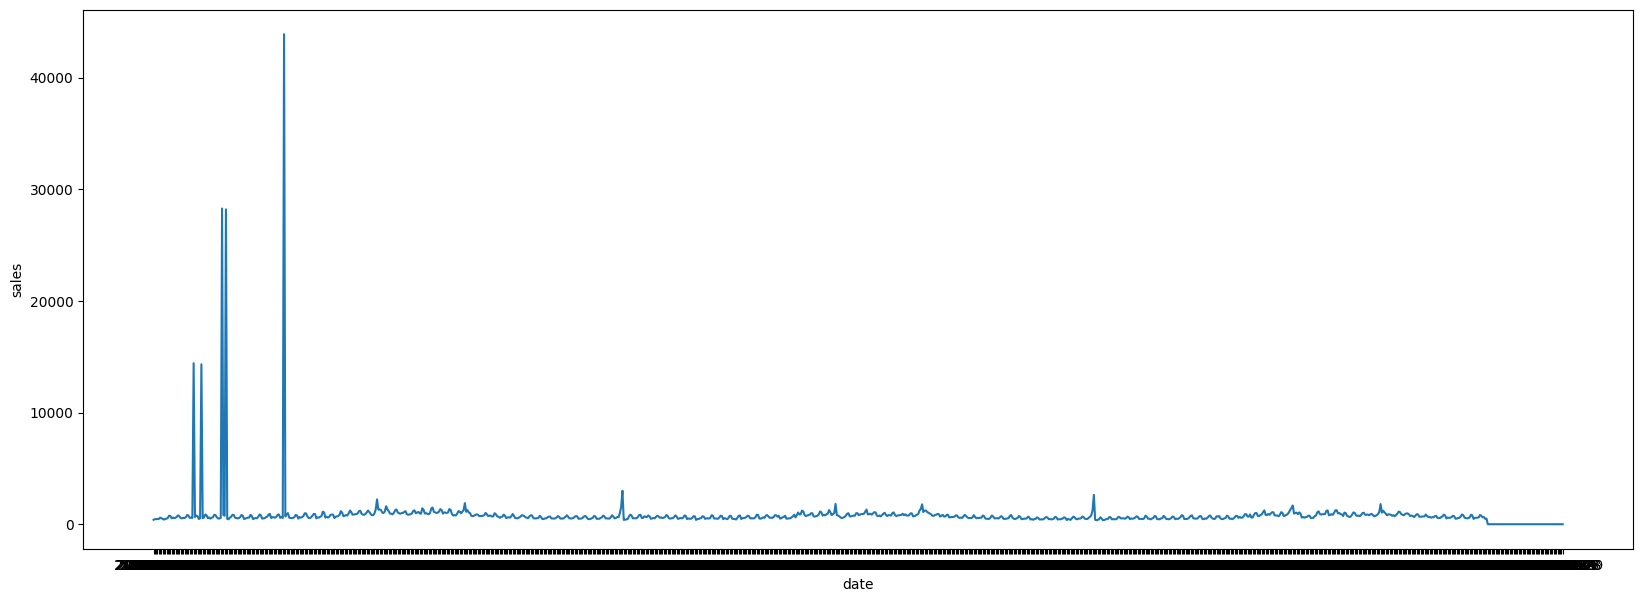

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
plt.figure(100, figsize=(20, 7))
sns.lineplot(x = "date", y = "sales", data = P0103, palette="coolwarm");
#sns.lineplot(x = "date", y = "discount", data = P0103, palette="coolwarm");

<ipython-input-25-9b2dc256c8c1>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = "date", y = "sales", data = P0438, palette="coolwarm");


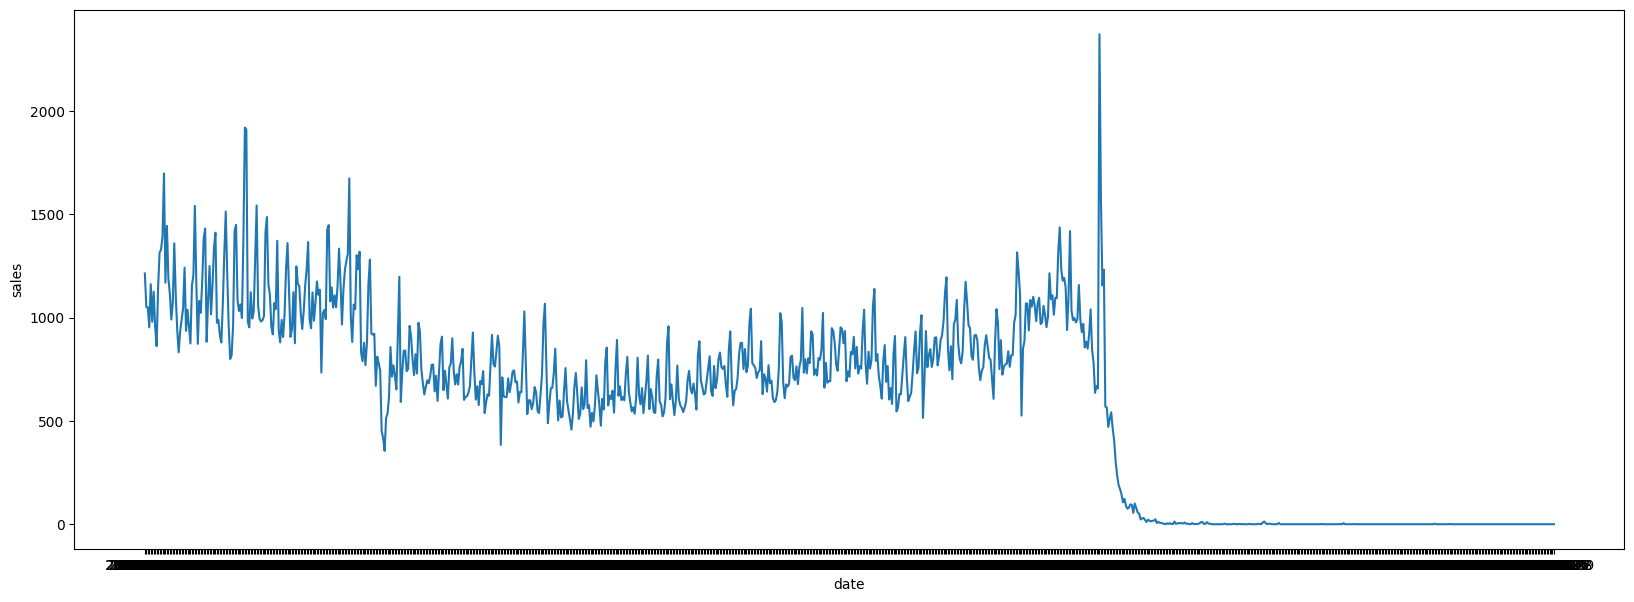

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
plt.figure(100, figsize=(20, 7))
sns.lineplot(x = "date", y = "sales", data = P0438, palette="coolwarm");
#sns.lineplot(x = "date", y = "discount", data = P0438, palette="coolwarm");

<ipython-input-26-a4185b152f01>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = "date", y = "sales", data = P0364, palette="coolwarm");


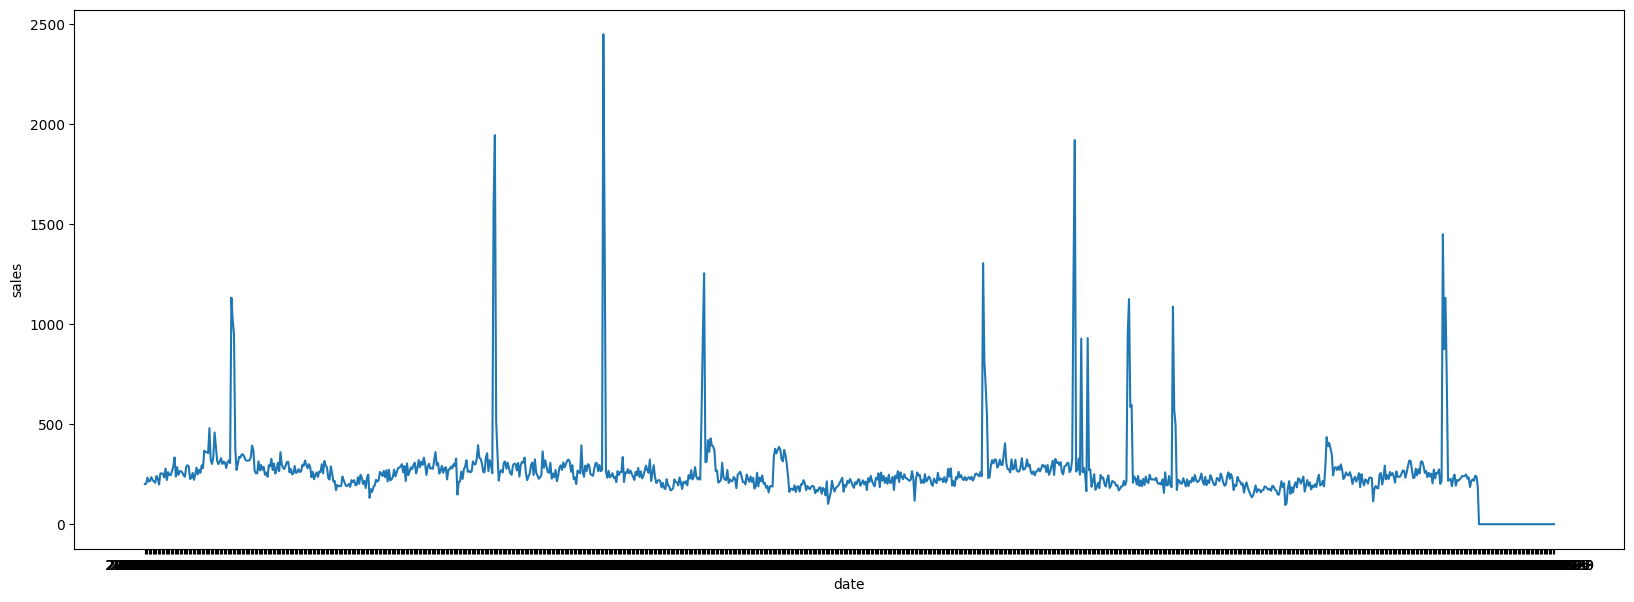

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
plt.figure(100, figsize=(20, 7))
sns.lineplot(x = "date", y = "sales", data = P0364, palette="coolwarm");

<ipython-input-27-6ea4d8c237d0>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = "date", y = "discount", data = P0364, palette="coolwarm");


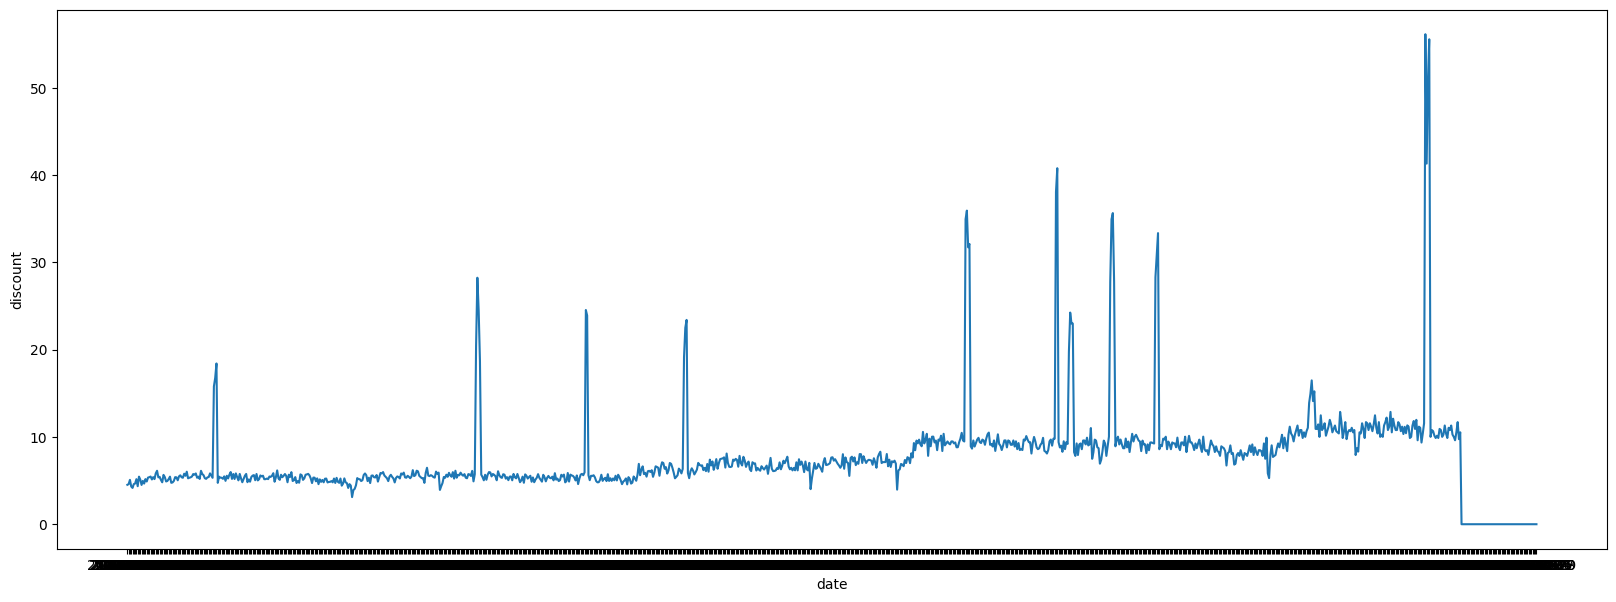

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
plt.figure(100, figsize=(20, 7))
sns.lineplot(x = "date", y = "discount", data = P0364, palette="coolwarm");

In [ ]:
#see the correlation between sales of products to see if they are interacting
#Select all the products that belong to a category and see if there is any interaction
product_hierarchy.head(10)

,product_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,P0000,5.0,20.0,12.0,NaN,H00,H0004,H000401,H00040105,H0004010534
1,P0001,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,P0002,22.0,40.0,22.0,cluster_0,H03,H0315,H031508,H03150800,H0315080028
3,P0004,2.0,13.0,4.0,cluster_3,H03,H0314,H031405,H03140500,H0314050003
4,P0005,16.0,30.0,16.0,cluster_9,H03,H0312,H031211,H03121109,H0312110917
5,P0006,8.5,15.0,15.0,cluster_0,H03,H0316,H031608,H03160817,H0316081708
6,P0007,2.0,22.0,9.5,cluster_4,H03,H0313,H031305,H03130519,H0313051904
7,P0008,5.0,16.0,5.0,cluster_0,H00,H0000,H000004,H00000400,H0000040017
8,P0009,5.0,18.0,14.0,cluster_6,H00,H0002,H000201,H00020100,H0002010012
9,P0010,2.0,22.0,3.0,cluster_0,H01,H0108,H010801,H01080109,H0108010917


In [ ]:
product_hierarchy.describe()

,product_length,product_depth,product_width
count,681.000000,683.000000,683.000000
mean,7.232305,18.460908,13.454758
std,8.512507,14.269750,10.137132
min,0.000000,0.000000,0.000000
25%,3.000000,10.900000,7.450000
50%,5.000000,17.000000,10.800000
75%,8.000000,23.150000,16.000000
max,100.000000,165.000000,100.000000


In [ ]:
product_hierarchy.shape

(699, 10)

In [ ]:
for column in product_hierarchy.columns:
    print(f"Unique values in {column}: {len(product_hierarchy[column].unique())}")

Unique values in product_id: 699
Unique values in product_length: 124
Unique values in product_depth: 164
Unique values in product_width: 145
Unique values in cluster_id: 11
Unique values in hierarchy1_id: 4
Unique values in hierarchy2_id: 18
Unique values in hierarchy3_id: 79
Unique values in hierarchy4_id: 168
Unique values in hierarchy5_id: 373


In [ ]:
#for cluster in product_hierarchy['cluster_id'].unique():
 #   print(f"unique values in {cluster}: {len(product_hierarchy[product_hierarchy['cluster_id']==cluster]['product_id'].unique())}

In [ ]:
data['promo_type_1'].unique()

array(['PR14', 'PR05', 'PR10', 'PR03', 'PR06', 'PR07', 'PR12', 'PR17',
       'PR08', 'PR13', 'PR09', 'PR16', 'PR15', 'PR01', 'PR18', 'PR11',
       'PR04'], dtype=object)

In [ ]:
data['promo_type_2'].unique()


array(['PR03', 'PR02', 'PR01', 'PR04'], dtype=object)

In [ ]:
data['promo_bin_1'].unique()

array([nan, 'high', 'verylow', 'veryhigh', 'moderate', 'low'],
      dtype=object)

In [ ]:
data['promo_bin_2'].unique()

array([nan, 'verylow', 'high', 'veryhigh', 'low'], dtype=object)

In [ ]:
data.shape

(19454838, 14)

In [ ]:
data[data['product_id']=='P0103'].shape

(135841, 14)

In [ ]:
data[data['product_id']=='P0103'].merge(product_hierarchy,on=['product_id'],how='left').shape

(135841, 23)

In [ ]:
store.shape

(144, 4)

In [ ]:
for column in store.columns:
    print(f"Unique values in {column}: {len(store[column].unique())}")

Unique values in store_id: 144
Unique values in storetype_id: 4
Unique values in store_size: 41
Unique values in city_id: 37


In [ ]:
#Create some charts and aggregations
all_data=data.merge(product_hierarchy,on=['product_id'],how='left').merge(store,on=['store_id'],how='left')

In [ ]:
all_data.head(10)

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,...,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id,storetype_id,store_size,city_id
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,...,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006,ST04,39,C007
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,...,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006,ST04,28,C005
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,...,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006,ST04,33,C026
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,...,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006,ST04,31,C008
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,...,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006,ST04,25,C024
5,P0001,S0027,2017-01-02,0.0,0.00,7.0,6.25,PR14,NaN,PR03,...,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006,ST04,24,C022
6,P0001,S0040,2017-01-02,0.0,0.00,19.0,6.25,PR14,NaN,PR03,...,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006,ST04,42,C017
7,P0001,S0049,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,...,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006,ST04,25,C031
8,P0001,S0050,2017-01-02,0.0,0.00,5.0,6.25,PR14,NaN,PR03,...,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006,ST04,31,C014
9,P0001,S0051,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,...,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006,ST04,39,C027


In [ ]:
all_data.groupby(['cluster_id'])['product_id'].nunique()

cluster_id
cluster_0    450
cluster_1      4
cluster_2     12
cluster_3     31
cluster_4     36
cluster_5     13
cluster_6     28
cluster_7     10
cluster_8     14
cluster_9     51
Name: product_id, dtype: int64

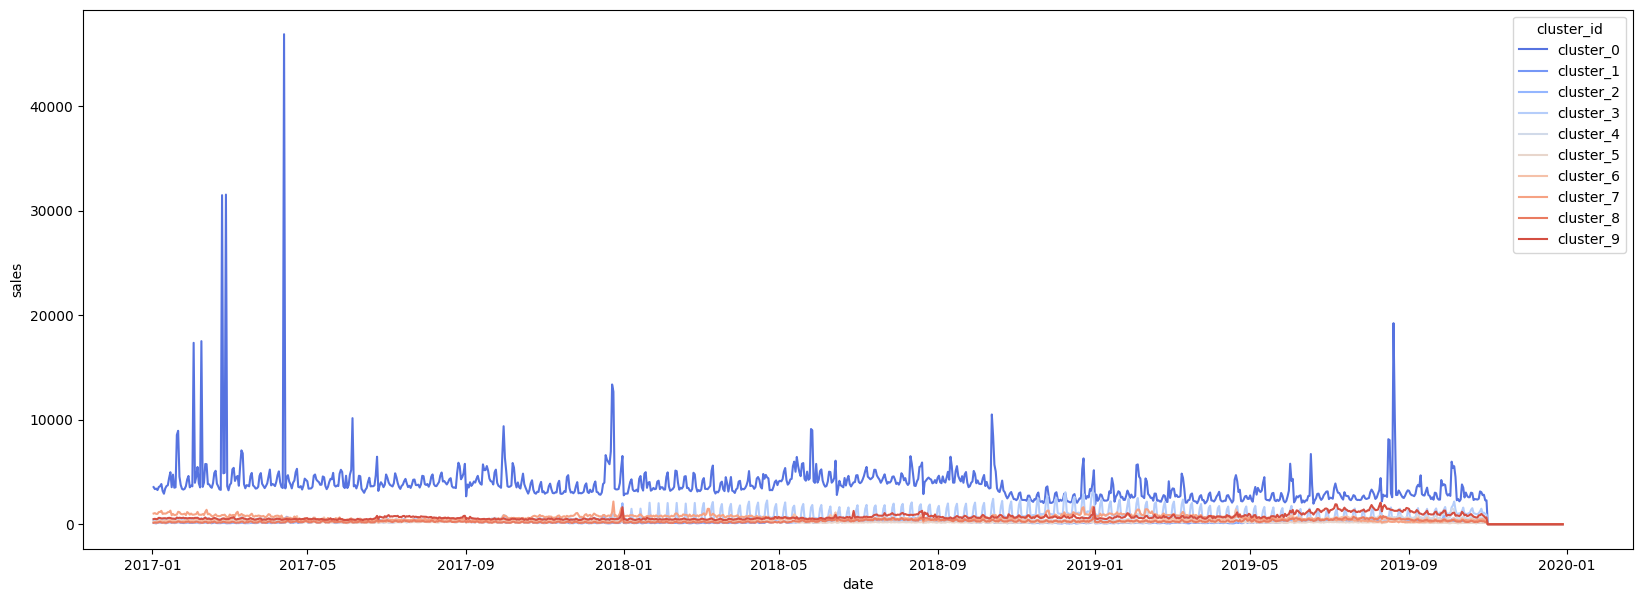

In [ ]:
#Lets see when the sales are decaying so we can cut the date and predict the next period
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
plt.figure(100, figsize=(20, 7))
sns.lineplot(x = "date", y = "sales", data=all_data.groupby(['date','cluster_id'])['sales'].sum().reset_index(), hue='cluster_id',palette="coolwarm");


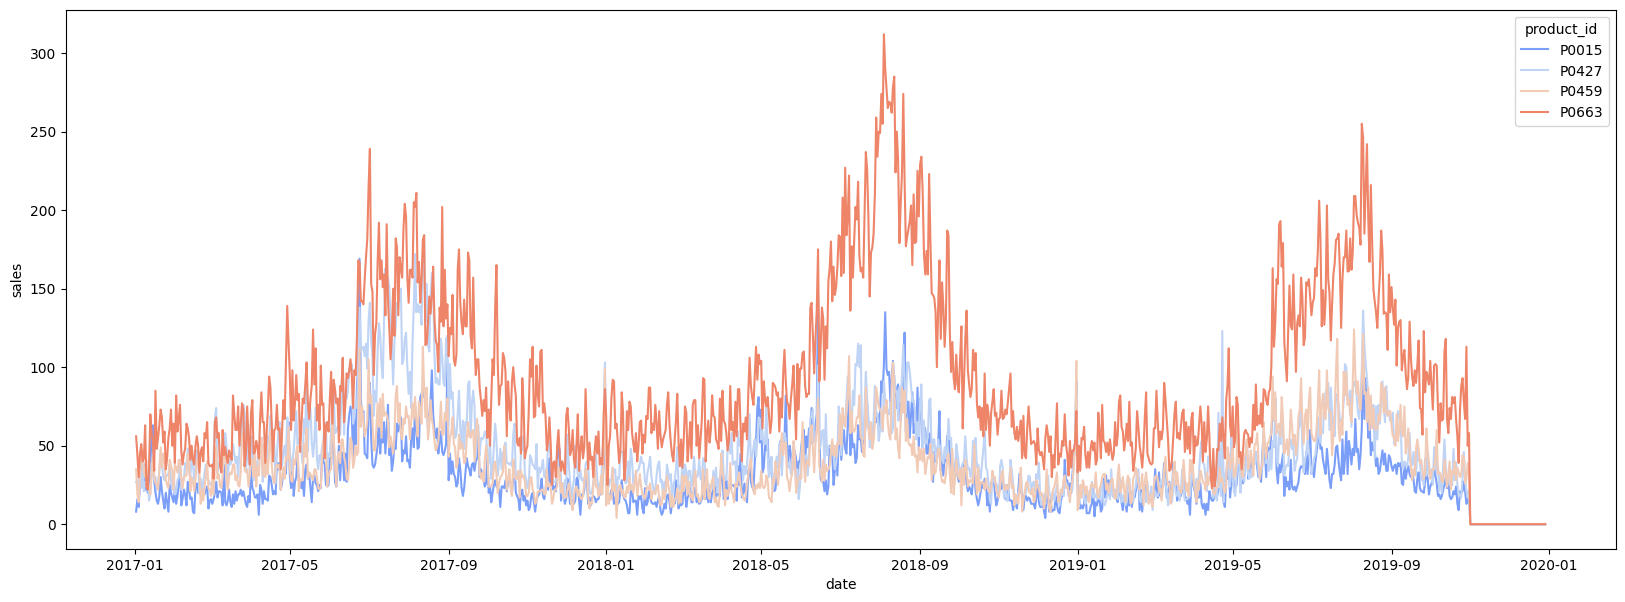

In [ ]:
#Lets see when the sales are decaying so we can cut the date and predict the next period
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
plt.figure(100, figsize=(20, 7))
sns.lineplot(x = "date", y = "sales", data=all_data[all_data['cluster_id']=='cluster_1'].groupby(['date','product_id'])['sales'].sum().reset_index(), hue='product_id',palette="coolwarm");


In [ ]:
#cluster 1 seems a good candidate for optimization
all_data[all_data['cluster_id']=='cluster_1'].groupby(['product_id'])['sales'].sum()

product_id
P0015    33588.0
P0427    49945.0
P0459    40525.0
P0663    97886.0
Name: sales, dtype: float64

In [ ]:
#cluster 1 seems a good candidate for optimization we need to calucalte the average sales per store
new=all_data[all_data['cluster_id']=='cluster_1'].groupby(['store_size'])['store_id'].nunique().reset_index().merge(all_data[all_data['cluster_id']=='cluster_1'].groupby(['store_size'])['sales'].sum().reset_index(),on ='store_size' )
new['avg_sales_per_store']=new['sales']/new['store_id']

In [ ]:
store_size_bins=pd.cut(new['avg_sales_per_store'],bins=3, labels =['Small','Medium','Big'])

In [ ]:
new['size_bins']=store_size_bins

In [ ]:
all_data.columns

Index(['product_id', 'store_id', 'date', 'sales', 'revenue', 'stock', 'price',
       'promo_type_1', 'promo_bin_1', 'promo_type_2', 'promo_bin_2',
       'promo_discount_2', 'promo_discount_type_2', 'discount',
       'product_length', 'product_depth', 'product_width', 'cluster_id',
       'hierarchy1_id', 'hierarchy2_id', 'hierarchy3_id', 'hierarchy4_id',
       'hierarchy5_id', 'storetype_id', 'store_size', 'city_id'],
      dtype='object')

In [ ]:
all_data.shape

(19454838, 26)

In [ ]:
newred=new[['store_size','size_bins']]

In [ ]:
newred

,store_size,size_bins
0,6,Small
1,8,Small
2,11,Small
3,12,Small
4,13,Small
5,14,Small
6,15,Small
7,16,Small
8,17,Small
9,18,Small


In [ ]:
all_data=all_data.merge(newred,on='store_size')

In [ ]:
# the store size is not really realevant. we will recreate this column by having 
# big_store 

In [ ]:
#We will take cluster_id 1 products (they are only 4 but have consistent sales)

In [ ]:
cluster_1_data=all_data[all_data['cluster_id']=='cluster_1']

In [ ]:
cluster_1_data.columns

Index(['product_id', 'store_id', 'date', 'sales', 'revenue', 'stock', 'price',
       'promo_type_1', 'promo_bin_1', 'promo_type_2', 'promo_bin_2',
       'promo_discount_2', 'promo_discount_type_2', 'discount',
       'product_length', 'product_depth', 'product_width', 'cluster_id',
       'hierarchy1_id', 'hierarchy2_id', 'hierarchy3_id', 'hierarchy4_id',
       'hierarchy5_id', 'storetype_id', 'store_size', 'city_id', 'size_bins'],
      dtype='object')

In [ ]:
cluster_1_data.date.min()

Timestamp('2017-01-02 00:00:00')

In [ ]:
cluster_1_data.date.max()

Timestamp('2019-12-29 00:00:00')

In [ ]:
pd.Timestamp('2019-12-01')

Timestamp('2019-12-01 00:00:00')

In [ ]:
#Let's create the ETL and transformations needed
#First let's fill the price with close rows
cluster_1_data[~cluster_1_data['price'].isna()].shape

(398521, 27)

In [ ]:
cluster_1_data['price']=cluster_1_data['price'].ffill()

<ipython-input-64-ca0d1c747c33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data['price']=cluster_1_data['price'].ffill()


In [ ]:
cluster_1_data[cluster_1_data['price'].isna()].shape

(0, 27)

In [ ]:
#create discount column with all values

#cluster_1_data['new_discount'] = df.apply(lambda row: row['ColumnA'] + row['ColumnB'] if row['ColumnA'] != 0 and row['ColumnB'] != 0 else 0, axis=1)


cluster_1_data['new_price']=cluster_1_data.apply(lambda row : row['revenue']/row['sales'] if row['sales'] != 0  else 0, axis=1)

<ipython-input-66-6441190cb320>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data['new_price']=cluster_1_data.apply(lambda row : row['revenue']/row['sales'] if row['sales'] != 0  else 0, axis=1)


In [ ]:
cluster_1_data['new_discount']=cluster_1_data.apply(lambda row : row['price']- row['new_price'], axis=1)

<ipython-input-67-9130d9d1ec6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data['new_discount']=cluster_1_data.apply(lambda row : row['price']- row['new_price'], axis=1)


In [ ]:
cluster_1_data['price'].unique()

array([2.6 , 2.45, 2.95, 3.25, 2.19, 3.15, 4.25, 3.95, 2.85, 3.35, 1.95,
       3.5 , 2.25, 4.75, 4.45, 4.95, 5.75, 4.4 , 3.45, 5.95, 3.8 , 6.95,
       6.75, 5.25, 5.45, 6.45, 3.65, 3.2 , 2.49, 2.  ])

In [ ]:
cluster_1_data['new_discount'].unique()

array([0.19      , 2.6       , 2.45      , ..., 1.02692308, 0.27      ,
       0.04333333])

In [ ]:
cluster_1_data.shape

(412458, 29)

In [ ]:
cluster_1_data.columns

Index(['product_id', 'store_id', 'date', 'sales', 'revenue', 'stock', 'price',
       'promo_type_1', 'promo_bin_1', 'promo_type_2', 'promo_bin_2',
       'promo_discount_2', 'promo_discount_type_2', 'discount',
       'product_length', 'product_depth', 'product_width', 'cluster_id',
       'hierarchy1_id', 'hierarchy2_id', 'hierarchy3_id', 'hierarchy4_id',
       'hierarchy5_id', 'storetype_id', 'store_size', 'city_id', 'size_bins',
       'new_price', 'new_discount'],
      dtype='object')

In [ ]:
#Create 
num_rows_to_extract = int(0.2 * len(cluster_1_data))

# Randomly sample 20% of the rows
sampled_df = cluster_1_data.sample(n=num_rows_to_extract)

In [ ]:
sampled_df.shape

(82491, 29)

In [ ]:
#sampled_df.to_excel('seeissuewithdisc2.xlsx')

In [ ]:
#Need to set to 0 discounts that are negative or rows where sales is 0
cluster_1_data.loc[cluster_1_data['new_discount']<0,'new_discount']=0

In [ ]:
cluster_1_data.loc[cluster_1_data['sales'] == 0,'new_discount']=0

In [ ]:
#Create dummy variables for 
cluster_1_data.columns

Index(['product_id', 'store_id', 'date', 'sales', 'revenue', 'stock', 'price',
       'promo_type_1', 'promo_bin_1', 'promo_type_2', 'promo_bin_2',
       'promo_discount_2', 'promo_discount_type_2', 'discount',
       'product_length', 'product_depth', 'product_width', 'cluster_id',
       'hierarchy1_id', 'hierarchy2_id', 'hierarchy3_id', 'hierarchy4_id',
       'hierarchy5_id', 'storetype_id', 'store_size', 'city_id', 'size_bins',
       'new_price', 'new_discount'],
      dtype='object')

In [ ]:
cluster_1_data.shape

(412458, 29)

In [ ]:
cluster_1_data=cluster_1_data.dropna(subset=['sales'])

In [ ]:
cluster_1_data.shape

(388859, 29)

In [ ]:
#create dummies for the right variables 
dummies_promo_type_1=pd.get_dummies(cluster_1_data['promo_type_1'],prefix='proty1_')

In [ ]:
#create dummies for the right variables 
dummies_promo_type_2=pd.get_dummies(cluster_1_data['promo_type_2'],prefix='proty2_')

In [ ]:
dummies_storetype_id=pd.get_dummies(cluster_1_data['storetype_id'],prefix='storetype_')

In [ ]:
cluster_1_data.columns

Index(['product_id', 'store_id', 'date', 'sales', 'revenue', 'stock', 'price',
       'promo_type_1', 'promo_bin_1', 'promo_type_2', 'promo_bin_2',
       'promo_discount_2', 'promo_discount_type_2', 'discount',
       'product_length', 'product_depth', 'product_width', 'cluster_id',
       'hierarchy1_id', 'hierarchy2_id', 'hierarchy3_id', 'hierarchy4_id',
       'hierarchy5_id', 'storetype_id', 'store_size', 'city_id', 'size_bins',
       'new_price', 'new_discount'],
      dtype='object')

In [ ]:
dummies_store_size=pd.get_dummies(cluster_1_data['size_bins'],prefix='storesize_')

In [ ]:
cluster_1_data=cluster_1_data.join(dummies_promo_type_1).join(dummies_promo_type_2).join(dummies_storetype_id).join(dummies_store_size)

In [ ]:
cluster_1_data.columns

Index(['product_id', 'store_id', 'date', 'sales', 'revenue', 'stock', 'price',
       'promo_type_1', 'promo_bin_1', 'promo_type_2', 'promo_bin_2',
       'promo_discount_2', 'promo_discount_type_2', 'discount',
       'product_length', 'product_depth', 'product_width', 'cluster_id',
       'hierarchy1_id', 'hierarchy2_id', 'hierarchy3_id', 'hierarchy4_id',
       'hierarchy5_id', 'storetype_id', 'store_size', 'city_id', 'size_bins',
       'new_price', 'new_discount', 'proty1__PR03', 'proty1__PR05',
       'proty1__PR06', 'proty1__PR07', 'proty1__PR08', 'proty1__PR10',
       'proty1__PR12', 'proty1__PR14', 'proty1__PR17', 'proty1__PR18',
       'proty2__PR02', 'proty2__PR03', 'storetype__ST01', 'storetype__ST02',
       'storetype__ST03', 'storetype__ST04', 'storesize__Small',
       'storesize__Medium', 'storesize__Big'],
      dtype='object')

In [ ]:
#remove variables not needed for the model
cluster_1_data_model=cluster_1_data[['product_id', 'store_id', 'date', 'sales', 'revenue', 'stock', 'price','new_discount', 'proty1__PR03', 'proty1__PR05', 'proty1__PR06',
       'proty1__PR07', 'proty1__PR08', 'proty1__PR10', 'proty1__PR12',
       'proty1__PR14', 'proty1__PR17', 'proty1__PR18', 'proty2__PR02',
       'proty2__PR03', 'storetype__ST01', 'storetype__ST02', 'storetype__ST03',
       'storetype__ST04', 'storesize__Small',
       'storesize__Medium', 'storesize__Big']]


In [ ]:
#add calendar variables
import datetime
import holidays
holidayst=holidays.Turkey()
cluster_1_data_model['weekday']=cluster_1_data_model['date'].dt.weekday
cluster_1_data_model['month']=cluster_1_data_model['date'].dt.month
cluster_1_data_model['holicday']=cluster_1_data_model['date'].apply(lambda x: holidayst.get(x))


<ipython-input-89-2169d711dda0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data_model['weekday']=cluster_1_data_model['date'].dt.weekday
<ipython-input-89-2169d711dda0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data_model['month']=cluster_1_data_model['date'].dt.month
<ipython-input-89-2169d711dda0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
#create dummies with the dates
dummies_week_day=pd.get_dummies(cluster_1_data_model['weekday'],prefix='weekday')
dummies_month=pd.get_dummies(cluster_1_data_model['month'],prefix='month')
cluster_1_data_model=cluster_1_data_model.join(dummies_week_day).join(dummies_month)

In [ ]:
dummies_holiday=pd.get_dummies(cluster_1_data_model['holicday'],prefix='holiday')
cluster_1_data_model=cluster_1_data_model.join(dummies_holiday)

In [ ]:
#It seems that the store sizes are very sparse investigate if there
cluster_1_data_model.drop(columns=['weekday', 'month', 'holicday'],inplace=True)

In [ ]:
cluster_1_data_model.columns

Index(['product_id', 'store_id', 'date', 'sales', 'revenue', 'stock', 'price',
       'new_discount', 'proty1__PR03', 'proty1__PR05', 'proty1__PR06',
       'proty1__PR07', 'proty1__PR08', 'proty1__PR10', 'proty1__PR12',
       'proty1__PR14', 'proty1__PR17', 'proty1__PR18', 'proty2__PR02',
       'proty2__PR03', 'storetype__ST01', 'storetype__ST02', 'storetype__ST03',
       'storetype__ST04', 'storesize__Small', 'storesize__Medium',
       'storesize__Big', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12',
       'holiday_Commemoration of Ataturk, Youth and Sports Day',
       'holiday_Democracy and National Unity Day', 'holiday_Labour Day',
       'holiday_National Sovereignty and Children's Day',
       'holiday_New Year's Day', 'holiday_Ramadan Feast',
       'holiday_Ramadan Feast Holid

In [ ]:
#Now before doing the correlations let's see if we see outliers that are not justified by any special offer/holiday
Q1 = cluster_1_data_model['sales'].quantile(0.25)
Q3 = cluster_1_data_model['sales'].quantile(0.96)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers=cluster_1_data_model[cluster_1_data_model['sales']>upper_bound]

In [ ]:
#outliers.to_excel('investigate_outliers.xlsx')

In [ ]:
cluster_1_data_model.describe()

,sales,revenue,stock,price,new_discount,proty1__PR03,proty1__PR05,proty1__PR06,proty1__PR07,proty1__PR08,...,holiday_Democracy and National Unity Day,holiday_Labour Day,holiday_National Sovereignty and Children's Day,holiday_New Year's Day,holiday_Ramadan Feast,holiday_Ramadan Feast Holiday,holiday_Republic Day,holiday_Sacrifice Feast,holiday_Sacrifice Feast Holiday,holiday_Victory Day
count,388859.000000,388859.000000,388859.000000,388859.000000,388859.000000,388859.000000,388859.000000,388859.000000,388859.000000,388859.000000,...,388859.000000,388859.000000,388859.000000,388859.000000,388859.000000,388859.000000,388859.000000,388859.000000,388859.000000,388859.000000
mean,0.570757,2.139200,23.149105,3.967967,0.139576,0.053294,0.002744,0.047645,0.032755,0.001026,...,0.003032,0.002837,0.002855,0.001913,0.002891,0.005825,0.002996,0.003019,0.009032,0.003042
std,1.275761,5.208591,33.588312,1.343755,0.434076,0.224620,0.052311,0.213013,0.177994,0.032016,...,0.054980,0.053183,0.053351,0.043699,0.053686,0.076097,0.054653,0.054863,0.094604,0.055073
min,0.000000,0.000000,0.000000,1.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,2.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,15.000000,3.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.730000,26.000000,4.750000,0.180000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97.000000,309.860000,798.000000,6.950000,6.203333,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


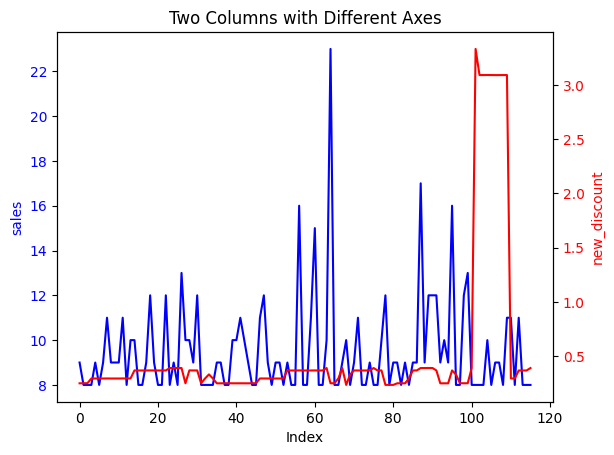

In [ ]:
#print discounts against sales to see if higher discounts justify outliers
df=outliers[outliers['product_id']=='P0459'].copy()
df=df.reset_index()
fig, ax1 = plt.subplots()

# Plot the first column with the primary y-axis
ax1.plot(df.index, df['sales'], color='blue', label='A')
ax1.set_xlabel('Index')
ax1.set_ylabel('sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis sharing the same x-axis with the primary y-axis
ax2 = ax1.twinx()

# Plot the second column with the secondary y-axis
ax2.plot(df.index, df['new_discount'], color='red', label='B')
ax2.set_ylabel('new_discount', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the title for the chart
plt.title('Two Columns with Different Axes')

# Display the chart
plt.show()

In [ ]:
#Tow outcomes.
#Limit the sales that are bigger than 35 as there is no justification for them
#limit the discount to one.


In [ ]:
#limit the discount to one.
cluster_1_data_model.loc[cluster_1_data_model['new_discount']>1,'new_discount']=1

In [ ]:
#Limit the sales that are bigger than 35 as there is no justification for them
cluster_1_data_model.loc[cluster_1_data_model['sales']> 35,'sales']=35

In [ ]:
#Ok now we are ready to model
import statsmodels.api as sm

In [ ]:
#We will split the data into training and testing
cluster_1_data_model['date'].min()

Timestamp('2017-01-02 00:00:00')

In [ ]:
cluster_1_data_model['date'].max()

Timestamp('2019-10-31 00:00:00')

In [ ]:
dummies_product=pd.get_dummies(cluster_1_data_model['product_id'],prefix='product')
cluster_1_data_model=cluster_1_data_model.join(dummies_product)

In [ ]:
test=cluster_1_data_model.loc[cluster_1_data_model['date']>pd.Timestamp('2019-08-31')]

In [ ]:
train=cluster_1_data_model.loc[cluster_1_data_model['date']<=pd.Timestamp('2019-08-31')]

In [ ]:
#add a constant to the DataFrame to account for the intercept
train['const']=1

<ipython-input-107-b6ea889d12b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['const']=1


In [ ]:
X=train[['const','price','new_discount', 'proty1__PR03', 'proty1__PR05', 'proty1__PR06',
       'proty1__PR07', 'proty1__PR08', 'proty1__PR10', 'proty1__PR12',
       'proty1__PR14', 'proty1__PR17', 'proty1__PR18', 'proty2__PR02',
       'proty2__PR03', 'storetype__ST01', 'storetype__ST02', 'storetype__ST03',
       'storetype__ST04', 'storesize__Small', 'storesize__Medium',
       'storesize__Big', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12',
       'holiday_Commemoration of Ataturk, Youth and Sports Day',
       'holiday_Democracy and National Unity Day', 'holiday_Labour Day',
       'holiday_National Sovereignty and Children\'s Day',
       'holiday_New Year\'s Day', 'holiday_Ramadan Feast',
       'holiday_Ramadan Feast Holiday', 'holiday_Republic Day',
       'holiday_Sacrifice Feast', 'holiday_Sacrifice Feast Holiday',
       'holiday_Victory Day']]

In [ ]:
y=train['sales']

In [ ]:
# Fit a GLM (with a Gaussian family and identity link function, which is equivalent to a linear regression)
glm = sm.GLM(y, X, family=sm.families.Gaussian(link=sm.families.links.identity()))
glm_results = glm.fit()

# Print the GLM summary
print(glm_results.summary())

# Calculate the predicted values (forecasts)
y_pred = glm_results.predict(X)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  sales   No. Observations:               363938
Model:                            GLM   Df Residuals:                   363889
Model Family:                Gaussian   Df Model:                           48
Link Function:               identity   Scale:                         0.96919
Method:                          IRLS   Log-Likelihood:            -5.1069e+05
Date:                Tue, 09 May 2023   Deviance:                   3.5268e+05
Time:                        03:04:08   Pearson chi2:                 3.53e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5024
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [ ]:
coefficients = glm_results.params
intercept = glm_results.params[-1]

In [ ]:
coefficients_with_intercept = pd.Series([intercept] + list(coefficients), index=["Intercept"] + list(X.columns))


In [ ]:
coefficients_with_intercept.to_excel('/content/drive/My Drive/coefficients_with_intercept.xlsx')

In [ ]:
train_withpred=pd.concat([train,y_pred.rename("y_pred")], axis=1)

In [ ]:
train_withpred.to_csv('/content/drive/My Drive/trainwithpred.csv')

In [ ]:
test.to_csv('/content/drive/My Drive/text.csv')

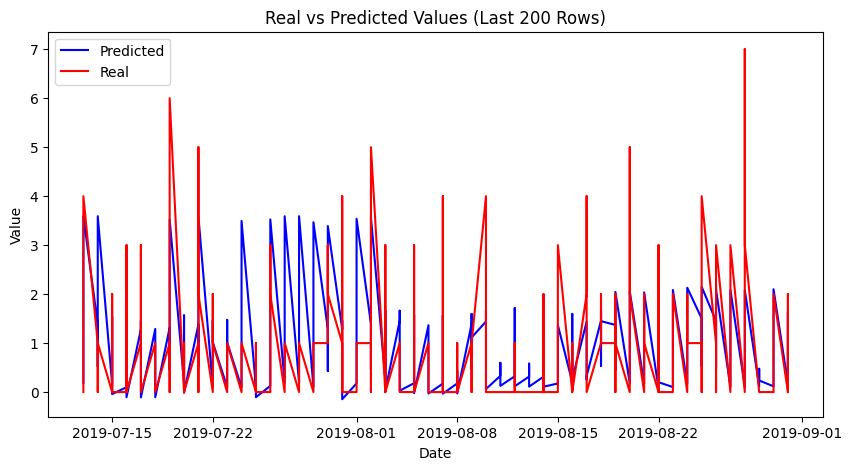

In [ ]:
train_last_200=train.tail(200)
y_pred_last_200 = pd.DataFrame(y_pred.tail(200).values, index=train_last_200.index, columns=['y_pred'])
y_last_200 = pd.DataFrame(y.tail(200).values, index=train_last_200.index, columns=['y_real'])

# Merge the real and predicted values into the original dataset
train_last_200 = train_last_200.join(y_last_200)
train_last_200 = train_last_200.join(y_pred_last_200)
# Create a new figure and set the figure size
plt.figure(figsize=(10, 5))

# Plot the predicted values (y_pred) with a blue line and label it "Predicted"
plt.plot(train_last_200['date'], train_last_200['y_pred'], color='blue', label='Predicted')

# Plot the real values (y) with a red line and label it "Real"
plt.plot(train_last_200['date'], train_last_200['y_real'], color='red', label='Real')

# Add a title to the plot
plt.title('Real vs Predicted Values (Last 200 Rows)')

# Add an x-axis label
plt.xlabel('Date')

# Add a y-axis label
plt.ylabel('Value')

# Add a legend to the plot to differentiate the lines
plt.legend()

# Display the plot
plt.show()


In [ ]:
coefficients.to_excel('/content/drive/My Drive/coefficients.xlsx')

In [ ]:
glm_results.params[-1]

0.5330817378209647

In [ ]:
dummies_product=pd.get_dummies(cluster_1_data_model['product_id'],prefix='product')
cluster_1_data_model=cluster_1_data_model.join(dummies_product)

In [ ]:
train=cluster_1_data_model.loc[cluster_1_data_model['date']<=pd.Timestamp('2019-08-31')]

In [ ]:
#I will add a variable that identifies the products
X=train[['price','new_discount', 'proty1__PR03', 'proty1__PR05', 'proty1__PR06',
       'proty1__PR07', 'proty1__PR08', 'proty1__PR10', 'proty1__PR12',
       'proty1__PR14', 'proty1__PR17', 'proty1__PR18', 'proty2__PR02',
       'proty2__PR03', 'storetype__ST01', 'storetype__ST02', 'storetype__ST03',
       'storetype__ST04', 'storesize__Small', 'storesize__Medium',
       'storesize__Big', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12',
       'holiday_Commemoration of Ataturk, Youth and Sports Day',
       'holiday_Democracy and National Unity Day', 'holiday_Labour Day',
       'holiday_National Sovereignty and Children\'s Day',
       'holiday_New Year\'s Day', 'holiday_Ramadan Feast',
       'holiday_Ramadan Feast Holiday', 'holiday_Republic Day',
       'holiday_Sacrifice Feast', 'holiday_Sacrifice Feast Holiday',
       'holiday_Victory Day','product_P0015', 'product_P0427',
       'product_P0459', 'product_P0663']]

In [ ]:
y=train['sales']

In [ ]:
cluster_1_data_model.shape

(388859, 61)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#lin_reg = make_pipeline(feat_transform, LinearRegression())
lin_reg.fit(X, y)

# Get R^2 from test data
y_pred = lin_reg.predict(X)
print(f"The R^2 value in the test set is {r2_score(y, y_pred)}")

The R^2 value in the test set is 0.41110067918874216


In [ ]:
coefficients = lin_reg.coef_
intercept = lin_reg.intercept_

In [ ]:
coefficients

array([-1.82514539e-01,  3.61218788e+00,  4.31474869e+10,  4.31474869e+10,
        4.31474869e+10,  4.31474869e+10,  4.31474869e+10,  4.31474869e+10,
        4.31474869e+10,  4.31474869e+10,  4.31474869e+10,  4.31474869e+10,
       -5.96210950e+11, -5.96210950e+11,  8.20799307e+11,  8.20799307e+11,
        8.20799307e+11,  8.20799307e+11,  5.16880533e+12,  5.16880533e+12,
        5.16880533e+12,  2.38411933e+10,  2.38411933e+10,  2.38411933e+10,
        2.38411933e+10,  2.38411933e+10,  2.38411933e+10,  2.38411933e+10,
       -1.86894952e+11, -1.86894952e+11, -1.86894952e+11, -1.86894952e+11,
       -1.86894952e+11, -1.86894952e+11, -1.86894952e+11, -1.86894952e+11,
       -1.86894952e+11, -1.86894952e+11, -1.86894952e+11, -1.86894952e+11,
        1.04980469e-02,  6.03942871e-02,  6.08215332e-02,  2.60620117e-02,
        2.12860107e-02,  8.71124268e-02,  8.95996094e-02, -3.60107422e-03,
        6.06079102e-02,  1.40136719e-01,  1.32141113e-02,  7.21710596e+11,
        7.21710596e+11,  

In [ ]:
cluster_1_data_model

In [ ]:
cluster_1_data_model_Prod1=cluster_1_data_model.loc[cluster_1_data_model['product_id']=='P0015']

In [ ]:
cluster_1_data_model_Prod2=cluster_1_data_model.loc[cluster_1_data_model['product_id']=='P0427']

In [ ]:
cluster_1_data_model_Prod3=cluster_1_data_model.loc[cluster_1_data_model['product_id']=='P0459']

In [ ]:
cluster_1_data_model_Prod4=cluster_1_data_model.loc[cluster_1_data_model['product_id']=='P0663']

In [ ]:
test=cluster_1_data_model.loc[cluster_1_data_model['date']>pd.Timestamp('2019-08-31')]

In [ ]:
cluster_1_data_model.product_id.unique()

array(['P0015', 'P0427', 'P0459', 'P0663'], dtype=object)

In [ ]:
#product 1
test=cluster_1_data_model_Prod1.loc[cluster_1_data_model_Prod1['date']>pd.Timestamp('2019-08-31')]
train=cluster_1_data_model_Prod1.loc[cluster_1_data_model_Prod1['date']<=pd.Timestamp('2019-08-31')]
train['const']=1
X=train[['const','price','new_discount', 'proty1__PR03', 'proty1__PR05', 'proty1__PR06',
       'proty1__PR07', 'proty1__PR08', 'proty1__PR10', 'proty1__PR12',
       'proty1__PR14', 'proty1__PR17', 'proty1__PR18', 'proty2__PR02',
       'proty2__PR03', 'storetype__ST01', 'storetype__ST02', 'storetype__ST03',
       'storetype__ST04', 'storesize__Small', 'storesize__Medium',
       'storesize__Big', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12',
       'holiday_Commemoration of Ataturk, Youth and Sports Day',
       'holiday_Democracy and National Unity Day', 'holiday_Labour Day',
       'holiday_National Sovereignty and Children\'s Day',
       'holiday_New Year\'s Day', 'holiday_Ramadan Feast',
       'holiday_Ramadan Feast Holiday', 'holiday_Republic Day',
       'holiday_Sacrifice Feast', 'holiday_Sacrifice Feast Holiday',
       'holiday_Victory Day']]
y=train['sales']
# Fit a GLM (with a Gaussian family and identity link function, which is equivalent to a linear regression)
glm = sm.GLM(y, X, family=sm.families.Gaussian(link=sm.families.links.identity()))
glm_results = glm.fit()

# Print the GLM summary
print(glm_results.summary())

# Calculate the predicted values (forecasts)
y_pred = glm_results.predict(X)

<ipython-input-117-748f6b9e0cbc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['const']=1


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  sales   No. Observations:                89471
Model:                            GLM   Df Residuals:                    89430
Model Family:                Gaussian   Df Model:                           40
Link Function:               identity   Scale:                         0.33676
Method:                          IRLS   Log-Likelihood:                -78244.
Date:                Tue, 09 May 2023   Deviance:                       30117.
Time:                        02:11:36   Pearson chi2:                 3.01e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6163
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [ ]:
#product 2
test=cluster_1_data_model_Prod2.loc[cluster_1_data_model_Prod2['date']>pd.Timestamp('2019-08-31')]
train=cluster_1_data_model_Prod2.loc[cluster_1_data_model_Prod2['date']<=pd.Timestamp('2019-08-31')]
train['const']=1
X=train[['const','price','new_discount', 'proty1__PR03', 'proty1__PR05', 'proty1__PR06',
       'proty1__PR07', 'proty1__PR08', 'proty1__PR10', 'proty1__PR12',
       'proty1__PR14', 'proty1__PR17', 'proty1__PR18', 'proty2__PR02',
       'proty2__PR03', 'storetype__ST01', 'storetype__ST02', 'storetype__ST03',
       'storetype__ST04', 'storesize__Small', 'storesize__Medium',
       'storesize__Big', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12',
       'holiday_Commemoration of Ataturk, Youth and Sports Day',
       'holiday_Democracy and National Unity Day', 'holiday_Labour Day',
       'holiday_National Sovereignty and Children\'s Day',
       'holiday_New Year\'s Day', 'holiday_Ramadan Feast',
       'holiday_Ramadan Feast Holiday', 'holiday_Republic Day',
       'holiday_Sacrifice Feast', 'holiday_Sacrifice Feast Holiday',
       'holiday_Victory Day']]
y=train['sales']
# Fit a GLM (with a Gaussian family and identity link function, which is equivalent to a linear regression)
glm = sm.GLM(y, X, family=sm.families.Gaussian(link=sm.families.links.identity()))
glm_results = glm.fit()

# Print the GLM summary
print(glm_results.summary())

# Calculate the predicted values (forecasts)
y_pred = glm_results.predict(X)

<ipython-input-118-2923ec044440>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['const']=1


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  sales   No. Observations:               100091
Model:                            GLM   Df Residuals:                   100049
Model Family:                Gaussian   Df Model:                           41
Link Function:               identity   Scale:                         0.77643
Method:                          IRLS   Log-Likelihood:            -1.2933e+05
Date:                Tue, 09 May 2023   Deviance:                       77665.
Time:                        02:11:37   Pearson chi2:                 7.77e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4050
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [ ]:
#product 3
test=cluster_1_data_model_Prod3.loc[cluster_1_data_model_Prod3['date']>pd.Timestamp('2019-08-31')]
train=cluster_1_data_model_Prod3.loc[cluster_1_data_model_Prod3['date']<=pd.Timestamp('2019-08-31')]
train['const']=1
X=train[['const','price','new_discount', 'proty1__PR03', 'proty1__PR05', 'proty1__PR06',
       'proty1__PR07', 'proty1__PR08', 'proty1__PR10', 'proty1__PR12',
       'proty1__PR14', 'proty1__PR17', 'proty1__PR18', 'proty2__PR02',
       'proty2__PR03', 'storetype__ST01', 'storetype__ST02', 'storetype__ST03',
       'storetype__ST04', 'storesize__Small', 'storesize__Medium',
       'storesize__Big', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12',
       'holiday_Commemoration of Ataturk, Youth and Sports Day',
       'holiday_Democracy and National Unity Day', 'holiday_Labour Day',
       'holiday_National Sovereignty and Children\'s Day',
       'holiday_New Year\'s Day', 'holiday_Ramadan Feast',
       'holiday_Ramadan Feast Holiday', 'holiday_Republic Day',
       'holiday_Sacrifice Feast', 'holiday_Sacrifice Feast Holiday',
       'holiday_Victory Day']]
y=train['sales']
# Fit a GLM (with a Gaussian family and identity link function, which is equivalent to a linear regression)
glm = sm.GLM(y, X, family=sm.families.Gaussian(link=sm.families.links.identity()))
glm_results = glm.fit()

# Print the GLM summary
print(glm_results.summary())

# Calculate the predicted values (forecasts)
y_pred = glm_results.predict(X)

<ipython-input-119-03ca70a8ad15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['const']=1


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  sales   No. Observations:                67366
Model:                            GLM   Df Residuals:                    67329
Model Family:                Gaussian   Df Model:                           36
Link Function:               identity   Scale:                         0.56883
Method:                          IRLS   Log-Likelihood:                -76566.
Date:                Tue, 09 May 2023   Deviance:                       38298.
Time:                        02:11:38   Pearson chi2:                 3.83e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6247
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [ ]:
#product 4
test=cluster_1_data_model_Prod4.loc[cluster_1_data_model_Prod4['date']>pd.Timestamp('2019-08-31')]
train=cluster_1_data_model_Prod4.loc[cluster_1_data_model_Prod4['date']<=pd.Timestamp('2019-08-31')]
train['const']=1
X=train[['const','price','new_discount', 'proty1__PR03', 'proty1__PR05', 'proty1__PR06',
       'proty1__PR07', 'proty1__PR08', 'proty1__PR10', 'proty1__PR12',
       'proty1__PR14', 'proty1__PR17', 'proty1__PR18', 'proty2__PR02',
       'proty2__PR03', 'storetype__ST01', 'storetype__ST02', 'storetype__ST03',
       'storetype__ST04', 'storesize__Small', 'storesize__Medium',
       'storesize__Big', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12',
       'holiday_Commemoration of Ataturk, Youth and Sports Day',
       'holiday_Democracy and National Unity Day', 'holiday_Labour Day',
       'holiday_National Sovereignty and Children\'s Day',
       'holiday_New Year\'s Day', 'holiday_Ramadan Feast',
       'holiday_Ramadan Feast Holiday', 'holiday_Republic Day',
       'holiday_Sacrifice Feast', 'holiday_Sacrifice Feast Holiday',
       'holiday_Victory Day']]
y=train['sales']
# Fit a GLM (with a Gaussian family and identity link function, which is equivalent to a linear regression)
glm = sm.GLM(y, X, family=sm.families.Gaussian(link=sm.families.links.identity()))
glm_results = glm.fit()

# Print the GLM summary
print(glm_results.summary())

# Calculate the predicted values (forecasts)
y_pred = glm_results.predict(X)

<ipython-input-120-f4ad3964e76b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['const']=1


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  sales   No. Observations:               107010
Model:                            GLM   Df Residuals:                   106965
Model Family:                Gaussian   Df Model:                           44
Link Function:               identity   Scale:                          1.7803
Method:                          IRLS   Log-Likelihood:            -1.8268e+05
Date:                Tue, 09 May 2023   Deviance:                   1.9043e+05
Time:                        02:11:41   Pearson chi2:                 1.90e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5243
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [ ]:
y_pred_last_200=y_pred.tail(200).reset_index(drop=True)
y_last_200=y.tail(200).reset_index(drop=True)

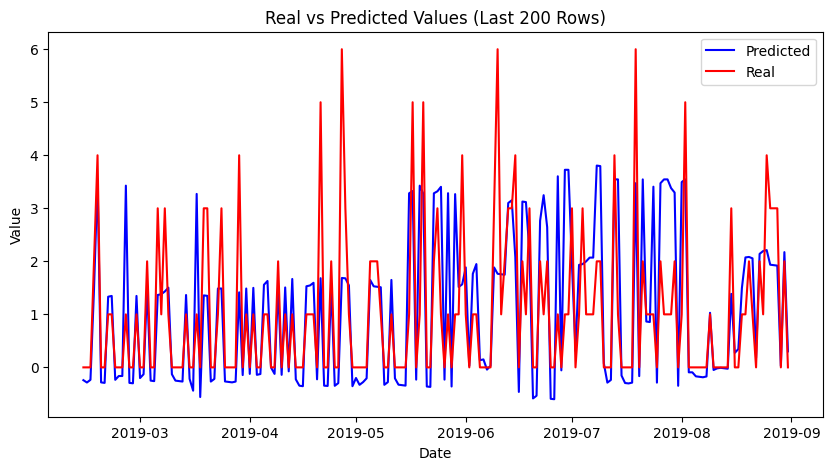

In [ ]:
train_last_200=train.tail(200)
y_pred_last_200 = pd.DataFrame(y_pred.tail(200).values, index=train_last_200.index, columns=['y_pred'])
y_last_200 = pd.DataFrame(y.tail(200).values, index=train_last_200.index, columns=['y_real'])

# Merge the real and predicted values into the original dataset
train_last_200 = train_last_200.join(y_last_200)
train_last_200 = train_last_200.join(y_pred_last_200)
# Create a new figure and set the figure size
plt.figure(figsize=(10, 5))

# Plot the predicted values (y_pred) with a blue line and label it "Predicted"
plt.plot(train_last_200['date'], train_last_200['y_pred'], color='blue', label='Predicted')

# Plot the real values (y) with a red line and label it "Real"
plt.plot(train_last_200['date'], train_last_200['y_real'], color='red', label='Real')

# Add a title to the plot
plt.title('Real vs Predicted Values (Last 200 Rows)')

# Add an x-axis label
plt.xlabel('Date')

# Add a y-axis label
plt.ylabel('Value')

# Add a legend to the plot to differentiate the lines
plt.legend()

# Display the plot
plt.show()



In [ ]:
#start with optimization
!pip install gurobipy  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 77.3 MB/s eta 0:00:00


In [ ]:
import gurobipy as gp 

In [ ]:
model_size_limited = gp.Model()

Restricted license - for non-production use only - expires 2024-10-28


In [ ]:
#Gurobi only accetps  linear regression and other transformation that are not GLM first I will try with them and 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
lin_reg=LinearRegression()



In [ ]:
lin_reg.fit(X,y)


LinearRegression()

In [ ]:
y_pred=lin_reg.predict(X)

In [ ]:
X.columns

Index(['const', 'price', 'new_discount', 'proty1__PR03', 'proty1__PR05',
       'proty1__PR06', 'proty1__PR07', 'proty1__PR08', 'proty1__PR10',
       'proty1__PR12', 'proty1__PR14', 'proty1__PR17', 'proty1__PR18',
       'proty2__PR02', 'proty2__PR03', 'storetype__ST01', 'storetype__ST02',
       'storetype__ST03', 'storetype__ST04', 'storesize__Small',
       'storesize__Medium', 'storesize__Big', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'holiday_Commemoration of Ataturk, Youth and Sports Day',
       'holiday_Democracy and National Unity Day', 'holiday_Labour Day',
       'holiday_National Sovereignty and Children's Day',
       'holiday_New Year's Day', 'holiday_Ramadan Feast',
       'holiday_Ramadan Feast Holiday', 'holiday_Republic Day',
       'holiday_Sacrifice Feast'

In [ ]:
print(f"The R^2 value in the test set is {r2_score(y, y_pred)}")

The R^2 value in the test set is 0.42634210199041667


In [ ]:
cluster_1_data_model_Prod4=cluster_1_data_model.loc[cluster_1_data_model['product_id']=='P0663']

In [ ]:
cluster_1_data_model_Prod4.shape

(115613, 57)

In [ ]:
#create ordinary least squares with 
cluster_1_data_model_Prod4.columns

Index(['product_id', 'store_id', 'date', 'sales', 'revenue', 'stock', 'price',
       'new_discount', 'proty1__PR03', 'proty1__PR05', 'proty1__PR06',
       'proty1__PR07', 'proty1__PR08', 'proty1__PR10', 'proty1__PR12',
       'proty1__PR14', 'proty1__PR17', 'proty1__PR18', 'proty2__PR02',
       'proty2__PR03', 'storetype__ST01', 'storetype__ST02', 'storetype__ST03',
       'storetype__ST04', 'storesize__Small', 'storesize__Medium',
       'storesize__Big', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12',
       'holiday_Commemoration of Ataturk, Youth and Sports Day',
       'holiday_Democracy and National Unity Day', 'holiday_Labour Day',
       'holiday_National Sovereignty and Children's Day',
       'holiday_New Year's Day', 'holiday_Ramadan Feast',
       'holiday_Ramadan Feast Holid

In [ ]:
test=cluster_1_data_model_Prod4.loc[cluster_1_data_model_Prod4['date']>pd.Timestamp('2019-07-31')]
train=cluster_1_data_model_Prod4.loc[cluster_1_data_model_Prod4['date']<=pd.Timestamp('2019-07-31')]
#columns for regression
X=train[['price',
       'new_discount', 'proty1__PR03', 'proty1__PR05', 'proty1__PR06',
       'proty1__PR07', 'proty1__PR08', 'proty1__PR10', 'proty1__PR12',
       'proty1__PR14', 'proty1__PR17', 'proty1__PR18', 'proty2__PR02',
       'proty2__PR03', 'storetype__ST01', 'storetype__ST02', 'storetype__ST03',
       'storetype__ST04', 'storesize__Small', 'storesize__Medium',
       'storesize__Big', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12',
       'holiday_Commemoration of Ataturk, Youth and Sports Day',
       'holiday_Democracy and National Unity Day', 'holiday_Labour Day',
       'holiday_National Sovereignty and Children\'s Day',
       'holiday_New Year\'s Day', 'holiday_Ramadan Feast',
       'holiday_Ramadan Feast Holiday', 'holiday_Republic Day',
       'holiday_Sacrifice Feast', 'holiday_Sacrifice Feast Holiday',
       'holiday_Victory Day']]

y=train['sales']
# Fit a GLM (with a Gaussian family and identity link function, which is equivalent to a linear regression)
lin_reg=LinearRegression()
lin_reg.fit(X, y)
# Get R^2 from test data
y_pred = lin_reg.predict(X)
print(f"The R^2 value in the test set is {r2_score(y, y_pred)}")

The R^2 value in the test set is 0.42726601672199915


In [ ]:
#Week to Optimize
opt_week=test.loc[test['date']<=pd.Timestamp('2019-08-07')]

In [ ]:
opt_week.shape

(1005, 57)

In [ ]:
#select only one store
opt_week['store_id'].unique()

array(['S0002', 'S0051', 'S0012', 'S0090', 'S0013', 'S0023', 'S0050',
       'S0132', 'S0142', 'S0025', 'S0042', 'S0049', 'S0060', 'S0105',
       'S0113', 'S0027', 'S0055', 'S0070', 'S0125', 'S0133', 'S0040',
       'S0056', 'S0062', 'S0066', 'S0104', 'S0063', 'S0082', 'S0083',
       'S0087', 'S0092', 'S0122', 'S0005', 'S0015', 'S0073', 'S0078',
       'S0084', 'S0091', 'S0107', 'S0094', 'S0097', 'S0115', 'S0096',
       'S0101', 'S0138', 'S0008', 'S0017', 'S0018', 'S0102', 'S0103',
       'S0131', 'S0036', 'S0106', 'S0144', 'S0061', 'S0108', 'S0110',
       'S0006', 'S0041', 'S0127', 'S0019', 'S0074', 'S0075', 'S0077',
       'S0086', 'S0134', 'S0136', 'S0141', 'S0038', 'S0044', 'S0085',
       'S0001', 'S0026', 'S0031', 'S0065', 'S0020', 'S0024', 'S0046',
       'S0043', 'S0003', 'S0010', 'S0035', 'S0045', 'S0052', 'S0058',
       'S0064', 'S0111', 'S0117', 'S0130', 'S0004', 'S0088', 'S0109',
       'S0118', 'S0123', 'S0139', 'S0009', 'S0030', 'S0128', 'S0143',
       'S0011', 'S00

In [ ]:
opt_week.loc[opt_week['store_id']=='S0002']

,product_id,store_id,date,sales,revenue,stock,price,new_discount,proty1__PR03,proty1__PR05,...,holiday_Democracy and National Unity Day,holiday_Labour Day,holiday_National Sovereignty and Children's Day,holiday_New Year's Day,holiday_Ramadan Feast,holiday_Ramadan Feast Holiday,holiday_Republic Day,holiday_Sacrifice Feast,holiday_Sacrifice Feast Holiday,holiday_Victory Day
433947,P0663,S0002,2019-08-01,2.0,11.02,35.0,6.95,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
434445,P0663,S0002,2019-08-02,3.0,16.53,32.0,6.95,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
434953,P0663,S0002,2019-08-03,7.0,38.56,25.0,6.95,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
435460,P0663,S0002,2019-08-04,0.0,0.00,25.0,6.95,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
435964,P0663,S0002,2019-08-05,4.0,22.04,21.0,6.75,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
436475,P0663,S0002,2019-08-06,4.0,22.04,17.0,6.75,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
436993,P0663,S0002,2019-08-07,0.0,0.00,17.0,6.75,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
opt_input=opt_week.loc[opt_week['store_id']=='S0002'][['price',
       'new_discount', 'proty1__PR03', 'proty1__PR05', 'proty1__PR06',
       'proty1__PR07', 'proty1__PR08', 'proty1__PR10', 'proty1__PR12',
       'proty1__PR14', 'proty1__PR17', 'proty1__PR18', 'proty2__PR02',
       'proty2__PR03', 'storetype__ST01', 'storetype__ST02', 'storetype__ST03',
       'storetype__ST04', 'storesize__Small', 'storesize__Medium',
       'storesize__Big', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12',
       'holiday_Commemoration of Ataturk, Youth and Sports Day',
       'holiday_Democracy and National Unity Day', 'holiday_Labour Day',
       'holiday_National Sovereignty and Children\'s Day',
       'holiday_New Year\'s Day', 'holiday_Ramadan Feast',
       'holiday_Ramadan Feast Holiday', 'holiday_Republic Day',
       'holiday_Sacrifice Feast', 'holiday_Sacrifice Feast Holiday',
       'holiday_Victory Day']]

In [ ]:
opt_input=opt_input.reset_index()

In [ ]:
days=['day_1','day_2','day_3','day_4','day_5','day_6','day_7']

In [ ]:
opt_input.set_index(pd.DataFrame(days,columns=['days'])['days']).drop(columns=['index']).reset_index().set_index(['days'])

,price,new_discount,proty1__PR03,proty1__PR05,proty1__PR06,proty1__PR07,proty1__PR08,proty1__PR10,proty1__PR12,proty1__PR14,...,holiday_Democracy and National Unity Day,holiday_Labour Day,holiday_National Sovereignty and Children's Day,holiday_New Year's Day,holiday_Ramadan Feast,holiday_Ramadan Feast Holiday,holiday_Republic Day,holiday_Sacrifice Feast,holiday_Sacrifice Feast Holiday,holiday_Victory Day
days,,,,,,,,,,,,,,,,,,,,,
day_1,6.95,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
day_2,6.95,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
day_3,6.95,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
day_4,6.95,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
day_5,6.75,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
day_6,6.75,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
day_7,6.75,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data=pd.DataFrame(days)

In [ ]:
data=data.set_index(0)

In [ ]:
data['min_disc']=0
data['max_disc']=1

In [ ]:
data.reset_index()

,0,min_disc,max_disc
0,day_1,0,1
1,day_2,0,1
2,day_3,0,1
3,day_4,0,1
4,day_5,0,1
5,day_6,0,1
6,day_7,0,1


In [ ]:
data = pd.Series(
    {
        "day1": 0.0,
        "day2": 0.0,
        "day3": 0.0,
        "day4": 0.0,
        "day5": 0.0,
        "day6": 0.0,
        "day7": 0.0
    }, name='min_disc'
)

In [ ]:
feats=pd.concat([feats,opt_input],axis=1)

In [ ]:
feats

In [ ]:
data

In [ ]:
data=pd.DataFrame(data)

In [ ]:
data['max_disc']=1

In [ ]:
data